In [134]:
# General Libraries
import os
print(os.listdir("../input"))

# LinAlg and Dataframes
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Scores
from sklearn.metrics import accuracy_score

['gender_submission.csv', 'test.csv', 'train.csv']


In [135]:
titanic_dataset = pd.read_csv("../input/train.csv")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can observe there are 891 data points. But there are few problems:

1. Only 714 non-null Age ==> 177 Null Age
2. Only 204 non-null Cabin ==> 687 Null Cabin
3. Only 889 non-null Embarked ==> 2 Null Embarked
4. Name, Sex, Ticket, Cabin, Embarked are object types, but we loaded it from CSV so these are strings/text attribute

To remove the problem #4 we try to see if these are repetitive, to find if there are any categories

**value_counts()** is used to get the individual number of counts for each possible value in the column. We use it to see if the values an attribute takes is repetitive or not.

In [137]:
titanic_dataset["Name"].value_counts()

Theobald, Mr. Thomas Leonard                             1
Hansen, Mr. Claus Peter                                  1
Penasco y Castellana, Mr. Victor de Satode               1
Burke, Mr. Jeremiah                                      1
Hickman, Mr. Leonard Mark                                1
Thayer, Mrs. John Borland (Marian Longstreth Morris)     1
Moutal, Mr. Rahamin Haim                                 1
Danbom, Mr. Ernst Gilbert                                1
Duran y More, Miss. Asuncion                             1
Kent, Mr. Edward Austin                                  1
Becker, Miss. Marion Louise                              1
Markoff, Mr. Marin                                       1
Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)     1
Rogers, Mr. William John                                 1
Meyer, Mrs. Edgar Joseph (Leila Saks)                    1
Lahoud, Mr. Sarkis                                       1
Coleff, Mr. Satio                                       

Booo!! For the attribute name, it looks like there are no repetitions so we might not find any patterns. So we can declare that Name is a useless feature.

In [138]:
titanic_dataset["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Yayy! 1 down!!

In [139]:
titanic_dataset["Ticket"].value_counts()

1601                7
CA. 2343            7
347082              7
CA 2144             6
3101295             6
347088              6
S.O.C. 14879        5
382652              5
LINE                4
349909              4
2666                4
113781              4
4133                4
PC 17757            4
W./C. 6608          4
113760              4
347077              4
17421               4
19950               4
24160               3
PC 17755            3
PC 17572            3
29106               3
110413              3
248727              3
110152              3
PC 17760            3
13502               3
230080              3
SC/Paris 2123       3
                   ..
349206              1
21440               1
2672                1
2628                1
347060              1
386525              1
348124              1
113807              1
11753               1
349245              1
110564              1
PC 17600            1
4134                1
349244              1
374910    

Oops! looks like there is some repetition but almost practically useless

In [140]:
titanic_dataset["Cabin"].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
C22 C26            3
F2                 3
D                  3
E101               3
D26                2
D20                2
C123               2
B58 B60            2
B5                 2
C92                2
D35                2
D17                2
C83                2
B35                2
F G73              2
C126               2
B57 B59 B63 B66    2
B77                2
E25                2
C65                2
C93                2
B49                2
C125               2
B20                2
B18                2
F4                 2
                  ..
A26                1
C46                1
C128               1
D45                1
D47                1
E31                1
B102               1
A14                1
A5                 1
D7                 1
B30                1
E40                1
E68                1
B78                1
B69                1
C45                1
A31          

Similar case as Ticket.

In [141]:
titanic_dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Yayy! We found another

So,
* **Categories Exist**: Sex,Embarked
* **Do not Exist**: Name
* **Partial but almost useless**: Ticket, Cabin

To get some more insight into the data, we'll start with simple histograms
> Note: Histograms make sense only when the data is numerical

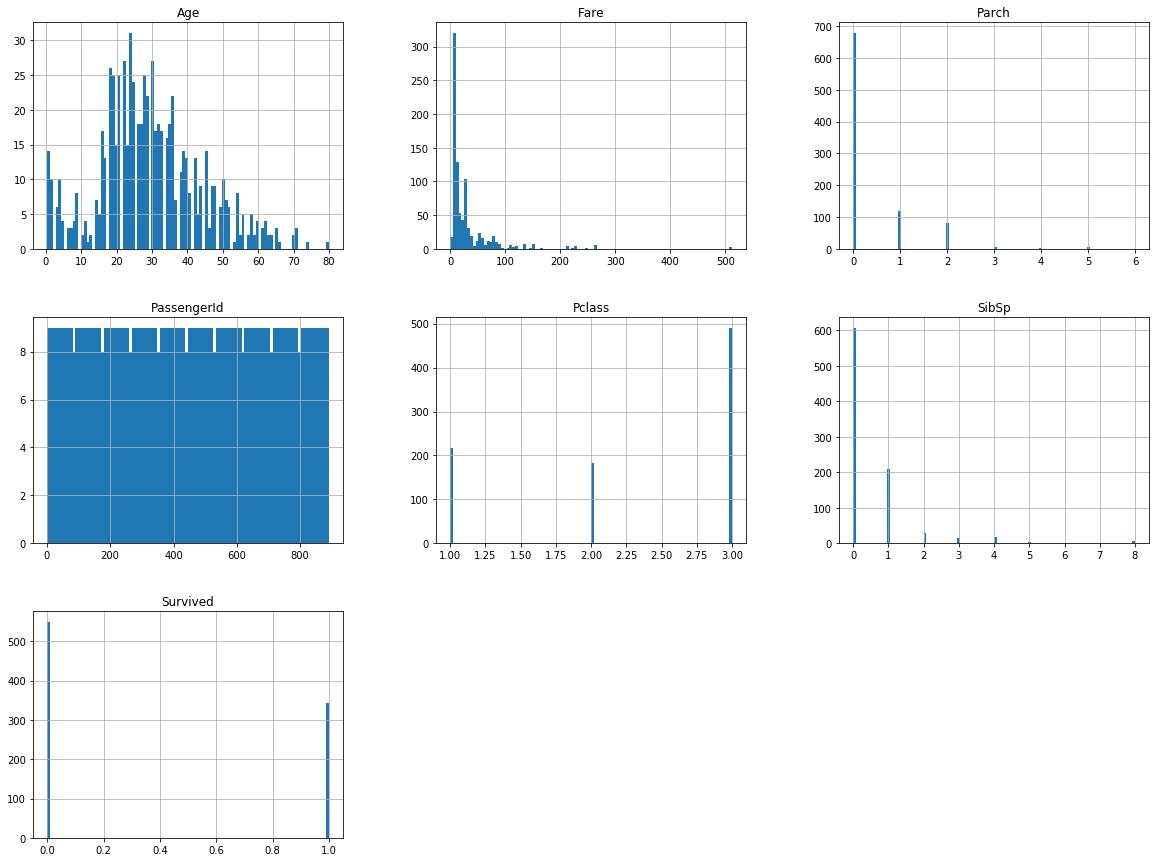

In [142]:
titanic_dataset.hist(bins=100,figsize=(20,15))
plt.show()

In [143]:
corr_matrix = titanic_dataset.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [144]:
"""
Dropping the attributes that seems to have absolutely no correlation with Survival of Passenger
"""
titanic_dataset = titanic_dataset.drop("Name",axis=1)
titanic_dataset = titanic_dataset.drop("Cabin",axis=1)
titanic_dataset = titanic_dataset.drop("Ticket",axis=1)
titanic_dataset = titanic_dataset.drop("PassengerId",axis=1)
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now that we have got some idea about the data and removed useless attributes, let's take care of missing values. This happened with Age and Embarked. And Age is the only numerical attribute, so we first fill NA with mean.

In [145]:
mean_age = titanic_dataset["Age"].mean()
titanic_dataset["Age"].fillna(mean_age,inplace=True)

In [146]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We still have 2 null objects for Embarked, it is better to drop those 2 datapoints because there is no point in filling that NA with some other values for Categorial data types

In [147]:
titanic_dataset = titanic_dataset.dropna(subset=["Embarked"])
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Even after all this cleaning, we still have a little bit more to do. Convert Sex, Embarked objects to numerical types

In [148]:
titanic_categorical = titanic_dataset[["Sex","Embarked"]]
titanic_categorical.head(10)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
5,male,Q
6,male,S
7,male,S
8,female,S
9,female,C


In [149]:
titanic_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 2 columns):
Sex         889 non-null object
Embarked    889 non-null object
dtypes: object(2)
memory usage: 20.8+ KB


In [150]:
titanic_dataset['Sex_Encoded'] = LabelEncoder().fit_transform(titanic_dataset['Sex'])
titanic_dataset[['Sex', 'Sex_Encoded']]

,Sex,Sex_Encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1
6,male,1
7,male,1
8,female,0
9,female,0


In [151]:
titanic_dataset['Embarked_Encoded'] = LabelEncoder().fit_transform(titanic_dataset['Embarked'])
titanic_dataset[['Embarked', 'Embarked_Encoded']]

,Embarked,Embarked_Encoded
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2
5,Q,1
6,S,2
7,S,2
8,S,2
9,C,0


In [152]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived            889 non-null int64
Pclass              889 non-null int64
Sex                 889 non-null object
Age                 889 non-null float64
SibSp               889 non-null int64
Parch               889 non-null int64
Fare                889 non-null float64
Embarked            889 non-null object
Sex_Encoded         889 non-null int64
Embarked_Encoded    889 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 76.4+ KB


Now we can drop the categorical values, with this our preprocessing is completed.

In [153]:
titanic_dataset = titanic_dataset.drop("Sex",axis=1)
titanic_dataset = titanic_dataset.drop("Embarked",axis=1)
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived            889 non-null int64
Pclass              889 non-null int64
Age                 889 non-null float64
SibSp               889 non-null int64
Parch               889 non-null int64
Fare                889 non-null float64
Sex_Encoded         889 non-null int64
Embarked_Encoded    889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


Woohoo!!! The preprocessing is done, now we have to build a classifier, majority of our attributes are categorical in nature so I'm thinking of using a Decision Tree Classifier.

In [154]:
X_attr = ["Pclass","Age","SibSp","Parch","Fare","Sex_Encoded","Embarked_Encoded"]
X = titanic_dataset[X_attr]
y_attr = ["Survived"]
y = titanic_dataset[y_attr]

In [155]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

## Attempt 1:  Decision Tree

In [156]:
DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
DT_preds = DT_clf.predict(test_set)

So underwhelming to see only 3 lines of actual building of model. I'm sorry, but that is just the way real life is...

78.71% is pretty good, but let us try to tune the parameters to get better accuracy

### Parameter 1: Maximum Depth of Decision Tree
If we allow the DT to grow till the maximum depth then we are overfitting to the training data, so we try to find the fine balance between depth and overfitting.

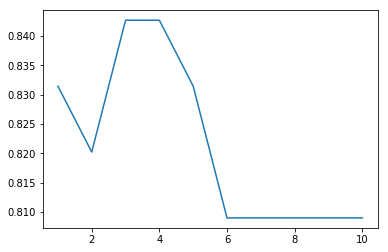

[0.8314606741573034, 0.8202247191011236, 0.8426966292134831, 0.8426966292134831, 0.8314606741573034, 0.8089887640449438, 0.8089887640449438, 0.8089887640449438, 0.8089887640449438, 0.8089887640449438]


In [157]:
x = [1,2,3,4,5,6,7,8,9,10]
scores = []
for max_depth in range(1,11):
    DT_clf_tuned = tree.DecisionTreeClassifier(max_depth=max_depth)
    DT_clf_tuned.fit(X_train,y_train)
    DT_clf_tuned_preds = DT_clf_tuned.predict(X_valid)
    scores.append(accuracy_score(y_valid,DT_clf_tuned_preds))
plt.plot(x,scores)
plt.show()
print(scores)

From the above graph it is clear that when **max_depth=3**, the Decision Tree performs the best. We need to this (plotting graph and finding ideal max_depth) with **validation set** (a part of training dataset). 

> Generally, when the **max depth** is ~ **no.features/2**, the model will have maximum accuracy.

In [158]:
test_set = pd.read_csv("../input/test.csv")
"""
Similar pre-processing with test data as well
1. Drop useless Features
2. Convert Object/Strings to Numerical Type
3. Fill NAs for Numerical Attributes
"""
# Step 1
test_set = test_set.drop("Name",axis=1)
test_set = test_set.drop("Cabin",axis=1)
test_set = test_set.drop("Ticket",axis=1)
test_set = test_set.drop("PassengerId",axis=1)
# Step 2
test_set['Sex_Encoded'] = test_set['Sex'].map( {'male':1, 'female':0} )
test_set['Embarked_Encoded'] = test_set['Embarked'].map( {'C':0, 'Q':1, 'S':2})
test_set = test_set.drop('Sex',axis=1)
test_set = test_set.drop('Embarked',axis=1)
# Step 3
mean_test_age = test_set["Age"].mean()
mean_fare = test_set["Fare"].mean()
test_set["Age"].fillna(mean_test_age,inplace=True)
test_set["Fare"].fillna(mean_fare,inplace=True)

In [159]:
DT_final = tree.DecisionTreeClassifier(max_depth=3)
DT_final.fit(X_train,y_train)
final_preds = DT_final.predict(test_set)

The test accuracy for this is 0.7799 ~ 0.78

### Parameter 2: Min Samples Split


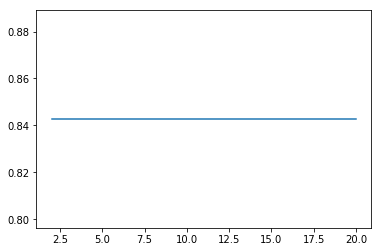

[0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831]


In [161]:
x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
scores = []
for min_samples_split in range(2,21):
    DT_clf_tuned = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=min_samples_split)
    DT_clf_tuned.fit(X_train,y_train)
    DT_clf_tuned_preds = DT_clf_tuned.predict(X_valid)
    scores.append(accuracy_score(y_valid,DT_clf_tuned_preds))
plt.plot(x,scores)
plt.show()
print(scores)

No significant change in the validation set accuracy, so we leave this at default

# Conclusion: DT(max_depth=3), probably the most optimal DT

## Attempt 2: Naive Bayes

In [ ]:
GNB_clf = GaussianNB()
GNB_clf.fit(X_train,y_train)
GNB_preds = GNB_clf.predict(test_set)